<font size=5>TensorFlow Tutorial——TensorFlow教程

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

# 设置环境变量以解决可能的库冲突
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# 在Jupyter Notebook中使用内联绘图
%matplotlib inline

# 设置随机种子以保证结果可复现
np.random.seed(1)


In [3]:
# 禁用即时执行模式
tf.compat.v1.disable_eager_execution()

# 定义常量 y_hat 和 y
y_hat = tf.constant(36, name='y_hat')  # y_hat 常量，设为 36
y = tf.constant(39, name='y')          # y 常量，设为 39

# 创建损失变量
loss = tf.Variable((y - y_hat)**2, name='loss')

# 初始化变量
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as session:  # 创建会话并打印输出
    session.run(init)                    # 初始化变量
    print(session.run(loss))             # 打印损失值

9


In [4]:
# 创建常量 a 和 b
a = tf.constant(2)
b = tf.constant(10)

# 通过乘法操作创建变量 c
c = tf.multiply(a, b)

# 打印变量 c
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [5]:
# 创建 TensorFlow 会话
sess = tf.compat.v1.Session()

# 运行会话并打印变量 c 的值
print(sess.run(c))

20


In [6]:
# 定义占位符 x
x = tf.compat.v1.placeholder(tf.int64, name='x')

# 通过 feed_dict 更改 x 的值，并计算 2*x
result = sess.run(2 * x, feed_dict={x: 3})

# 打印结果
print(result)

# 关闭 TensorFlow 会话
sess.close()

6


In [7]:
# 线性函数
def linear_function():
    """
    实现一个线性函数：
        初始化 W 为一个形状为 (4,3) 的随机张量
        初始化 X 为一个形状为 (3,1) 的随机张量
        初始化 b 为一个形状为 (4,1) 的随机张量
    返回：
    result -- 运行会话得到的 Y = WX + b 的结果
    """
    
    np.random.seed(1)
    
    X = tf.constant(np.random.randn(3, 1), name="X")
    W = tf.constant(np.random.randn(4, 3), name="W")
    b = tf.constant(np.random.randn(4, 1), name="b")
    Y = tf.add(tf.matmul(W, X), b)
    
    # 创建会话并在所需计算的变量上使用 sess.run(...) 运行会话
    sess = tf.compat.v1.Session()
    result = sess.run(Y)
    
    # 关闭会话 
    sess.close()

    return result

In [8]:
# 调用 linear_function 函数并打印结果
print("result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [9]:
def sigmoid(z):
    """
    计算sigmoid函数的值

    参数：
    z -- 输入值，标量或矢量

    返回：
    result -- sigmoid函数的值
    """

    # 创建一个名为 'x' 的占位符
    x = tf.compat.v1.placeholder(tf.float32, name="x")

    # 计算 sigmoid(x)
    sigmoid = tf.sigmoid(x)

    # 创建一个会话，并运行它。请使用上面解释的方法2。
    # 使用 feed_dict 将 z 的值传递给 x。
    with tf.compat.v1.Session() as sess:
        # 运行会话，并将输出命名为 "result"
        result = sess.run(sigmoid, feed_dict={x: z})

    return result

In [10]:
# 测试sigmoid函数的计算
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.99999386


In [11]:
# GRADED FUNCTION: cost
def cost(logits, labels):
    """
    使用sigmoid交叉熵计算损失函数
    
    参数:
    logits -- 包含z的向量，表示最后一个线性单元的输出（在最终sigmoid激活之前）
    labels -- 标签y的向量（1或0）
    
    注意：在本课程中，我们所称的“z”和“y”在TensorFlow文档中分别称为“logits”和“labels”。
    因此，logits将作为z输入，labels将作为y输入。
    
    返回:
    cost -- 运行损失函数的会话（公式（2））
    """
    
    # 创建“logits”（z）和“labels”（y）的占位符（大约2行）
    z = tf.compat.v1.placeholder(tf.float32, name="z")
    y = tf.compat.v1.placeholder(tf.float32, name="y")
    
    # 使用损失函数（大约1行）
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
    
    # 创建会话（大约1行），参见上面的方法1
    sess = tf.compat.v1.Session()
    
    # 运行会话（大约1行）
    cost = sess.run(cost, feed_dict={z: logits, y: labels})
    
    # 关闭会话（大约1行），参见上面的方法1
    sess.close()
      
    return cost

In [12]:
# 定义logits和标签数组
logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9]))
labels = np.array([0, 0, 1, 1])

# 计算损失值
cost = cost(logits, labels)

# 打印损失值
print("cost = " + str(cost))

cost = [1.0053872  1.0366409  0.4138543  0.39956614]


In [13]:
def one_hot_matrix(labels, C):
    """
    创建一个矩阵，其中第i行对应于第i个类别编号，第j列对应于第j个训练样本。
    如果第j个样本的标签为i，则(i, j)处的元素为1。
    
    参数：
    labels -- 包含标签的向量
    C -- 类别数量，即one hot维度的深度
    
    返回：
    one_hot -- one hot矩阵
    """
    
    # 创建一个等于C（深度）的tf.constant，命名为'C'
    C = tf.constant(value=C, name="C")
    
    # 使用tf.one_hot，注意轴的选择
    one_hot_matrix = tf.one_hot(labels, C, axis=0)
    
    # 创建会话
    sess = tf.compat.v1.Session()
    
    # 运行会话
    one_hot = sess.run(one_hot_matrix)
    
    # 关闭会话
    sess.close()
    
    return one_hot


In [14]:
# 定义标签向量和类别数量
labels = np.array([1,2,3,0,2,1])
C = 4

# 调用 one_hot_matrix 函数生成对应的 one hot 矩阵
one_hot = one_hot_matrix(labels, C)

# 打印输出结果
print("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [15]:
def ones(shape):
    """
    创建一个指定形状的全为 1 的数组
    
    参数：
    shape -- 要创建的数组的形状
        
    返回：
    ones -- 仅包含全为 1 的数组
    """
    
    # 使用 tf.ones(...) 创建 "ones" 张量
    ones = tf.ones(shape)
    
    # 创建会话
    sess = tf.compat.v1.Session()
    
    # 运行会话以计算 'ones' 张量的值
    ones = sess.run(ones)
    
    # 关闭会话
    sess.close()
    
    return ones

In [16]:
# 打印ones的值
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


In [17]:
# 加载数据集
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

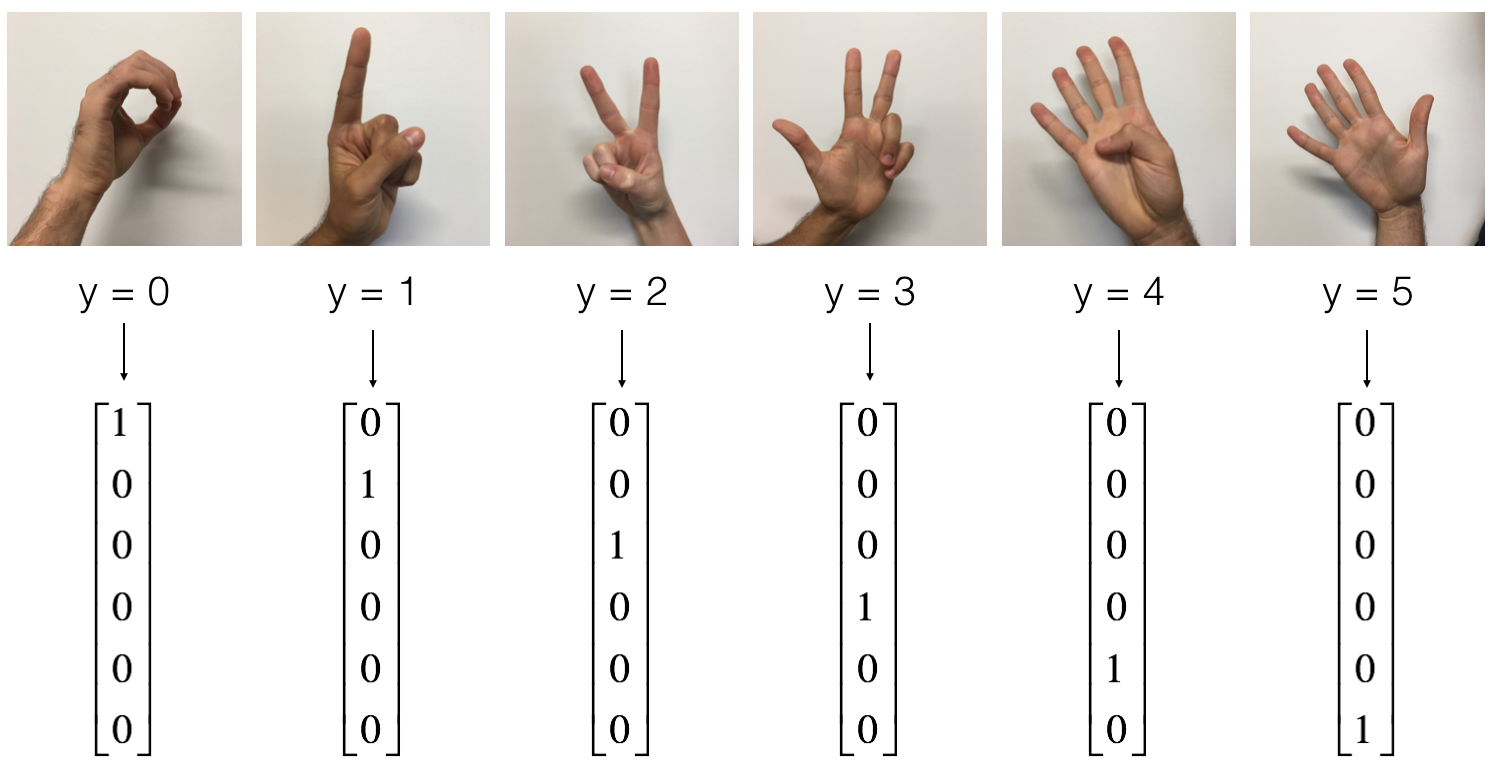

y = 5


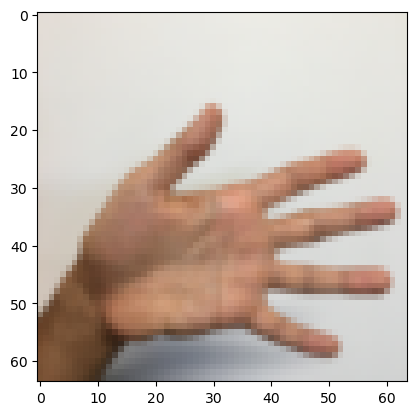

In [18]:
# 打印样例图片
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [19]:
# 将训练和测试图像展平
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# 对图像向量进行归一化
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.

# 将训练和测试标签转换为 one-hot 矩阵
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print("训练样本数量：" + str(X_train.shape[1]))
print("测试样本数量：" + str(X_test.shape[1]))
print("X_train 形状：" + str(X_train.shape))
print("Y_train 形状：" + str(Y_train.shape))
print("X_test 形状：" + str(X_test.shape))
print("Y_test 形状：" + str(Y_test.shape))

训练样本数量：1080
测试样本数量：120
X_train 形状：(12288, 1080)
Y_train 形状：(6, 1080)
X_test 形状：(12288, 120)
Y_test 形状：(6, 120)


In [20]:
def create_placeholders(n_x, n_y):
    """
    创建 TensorFlow 会话的占位符。
    
    参数：
    n_x -- 标量，图像向量的大小（num_px * num_px = 64 * 64 * 3 = 12288）
    n_y -- 标量，类别数（从 0 到 5，因此 -> 6）
    
    返回：
    X -- 数据输入的占位符，形状为 [n_x, None]，数据类型为 "float"
    Y -- 输入标签的占位符，形状为 [n_y, None]，数据类型为 "float"
    
    提示：
    - 使用 None 是因为它允许我们在占位符中对示例的数量有一定的灵活性。
      实际上，在测试/训练期间的示例数是不同的。
    """

    # 使用 tf.placeholder 创建了两个占位符 X 和 Y，其形状分别为 [n_x, None] 和 [n_y, None]
    X = tf.compat.v1.placeholder(tf.float32, shape=[n_x, None])
    Y = tf.compat.v1.placeholder(tf.float32, shape=[n_y, None])
    
    return X, Y

In [21]:
# 调用函数 create_placeholders，并传入参数 12288 和 6，即图像向量的大小和类别数
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(12288, None), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(6, None), dtype=float32)


In [22]:
def initialize_parameters():
    """
    使用 TensorFlow 初始化神经网络的参数。参数的形状如下：
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    返回:
    parameters -- 包含 W1、b1、W2、b2、W3、b3 的张量字典
    """
    
    tf.compat.v1.set_random_seed(1)                   # 为了确保你的“随机”数与我们的结果匹配
        
    
    initializer = tf.initializers.GlorotUniform(seed=1)
    W1 = tf.Variable(initializer(shape=[25, 12288]))
    b1 = tf.Variable(tf.zeros([25, 1]))
    W2 = tf.Variable(initializer(shape=[12, 25]))
    b2 = tf.Variable(tf.zeros([12, 1]))
    W3 = tf.Variable(initializer(shape=[6, 12]))
    b3 = tf.Variable(tf.zeros([6, 1]))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters


In [23]:
# 重置 TensorFlow 默认计算图
tf.compat.v1.reset_default_graph()

# 创建 TensorFlow 会话
with tf.compat.v1.Session() as sess:
    # 初始化参数
    parameters = initialize_parameters()
    
    # 打印参数的值
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'Variable:0' shape=(25, 12288) dtype=float32>
b1 = <tf.Variable 'Variable_1:0' shape=(25, 1) dtype=float32>
W2 = <tf.Variable 'Variable_2:0' shape=(12, 25) dtype=float32>
b2 = <tf.Variable 'Variable_3:0' shape=(12, 1) dtype=float32>


In [24]:
def forward_propagation(X, parameters):
    """
    实现模型的前向传播过程: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    参数:
    X -- 输入数据集占位符，形状为 (input size, number of examples)
    parameters -- 包含参数 "W1", "b1", "W2", "b2", "W3", "b3" 的 Python 字典，
                  这些参数的形状在 initialize_parameters 中给出

    返回值:
    Z3 -- 最后一个线性单元的输出
    """
    
    # 从字典 "parameters" 中检索参数
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Numpy 等价操作:
    Z1 = tf.add(tf.matmul(W1, X), b1)                                # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                               # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                               # Z3 = np.dot(W3,Z2) + b3
        
    return Z3

In [25]:
# 重置 TensorFlow 默认计算图
tf.compat.v1.reset_default_graph()
# 在 TensorFlow 会话中，首先创建占位符 X 和 Y，然后初始化参数，接着进行前向传播，计算输出 Z3 的值，并打印结果
with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, None), dtype=float32)


In [26]:
def compute_cost(Z3, Y):
    """
    计算成本
    
    参数：
    Z3 -- 前向传播的输出（最后一个线性单元的输出），形状为（6，样本数）
    Y -- 真实标签向量的占位符，与Z3形状相同
    
    返回：
    cost -- 成本函数的张量
    """
    
    # 调整形状以满足 TensorFlow 的要求 tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    # 计算cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost


In [27]:
# 重置 TensorFlow 默认计算图
tf.compat.v1.reset_default_graph()
# 在 TensorFlow 会话中，首先创建占位符 X 和 Y，然后初始化参数，接着进行前向传播，计算输出 Z3 的值和cost并打印结果
with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [28]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.0001, num_epochs=1500, minibatch_size=32, print_cost=True):
    """
    实现一个三层的 TensorFlow 神经网络模型：LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX。
    
    参数：
    X_train -- 训练集，形状为 (输入大小 = 12288, 训练样本数 = 1080)
    Y_train -- 测试集，形状为 (输出大小 = 6, 训练样本数 = 1080)
    X_test -- 训练集，形状为 (输入大小 = 12288, 训练样本数 = 120)
    Y_test -- 测试集，形状为 (输出大小 = 6, 测试样本数 = 120)
    learning_rate -- 优化过程的学习率
    num_epochs -- 优化循环的迭代次数
    minibatch_size -- 迷你批次的大小
    print_cost -- 是否打印成本值，默认为 True
    
    返回：
    parameters -- 模型学习到的参数，可以用于预测
    """
    
    ops.reset_default_graph()                         # 为了能够重新运行模型而不覆盖 TensorFlow 变量
    tf.compat.v1.set_random_seed(1)                             # 为了保持一致的结果
    seed = 3                                          # 为了保持一致的结果
    (n_x, m) = X_train.shape                          # (n_x: 输入大小, m : 训练集中的样本数)
    n_y = Y_train.shape[0]                            # n_y : 输出大小
    costs = []                                        # 用于跟踪成本
    
    # 创建形状为 (n_x, n_y) 的占位符
    X, Y = create_placeholders(n_x, n_y)

    # 初始化参数
    parameters = initialize_parameters() 
    
    # 前向传播：在 TensorFlow 图中构建前向传播过程
    Z3 = forward_propagation(X, parameters)
    
    # 成本函数：将成本函数添加到 TensorFlow 图中
    cost = compute_cost(Z3, Y)
    
    # 反向传播：定义 TensorFlow 优化器，使用 AdamOptimizer
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # 初始化所有变量
    init = tf.compat.v1.global_variables_initializer()

    # 开始会话计算 TensorFlow 图
    with tf.compat.v1.Session() as sess:
        
        # 运行初始化操作
        sess.run(init)
        
        # 进行训练循环
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # 定义与当前 epoch 相关的成本
            num_minibatches = int(m / minibatch_size) # 训练集中以 minibatch_size 为大小的迷你批次数量
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # 选择一个迷你批次
                (minibatch_X, minibatch_Y) = minibatch
                
                # 重要：运行图中的操作来执行 "optimizer" 和 "cost"，feed_dict 应包含一个迷你批次的 (X, Y)。
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # 每个 epoch 打印成本值
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # 绘制成本曲线
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations(per tens)')
        plt.title("learning rate =" + str(learning_rate))
        plt.show()

        # 将参数保存在变量中
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # 计算正确的预测值
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # 计算在测试集上的准确度
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters


Cost after epoch 0: 1.866523
Cost after epoch 100: 0.812711
Cost after epoch 200: 0.571792
Cost after epoch 300: 0.396471
Cost after epoch 400: 0.272797
Cost after epoch 500: 0.193884
Cost after epoch 600: 0.125877
Cost after epoch 700: 0.083809
Cost after epoch 800: 0.055819
Cost after epoch 900: 0.031889
Cost after epoch 1000: 0.020954
Cost after epoch 1100: 0.011795
Cost after epoch 1200: 0.008807
Cost after epoch 1300: 0.005339
Cost after epoch 1400: 0.003481


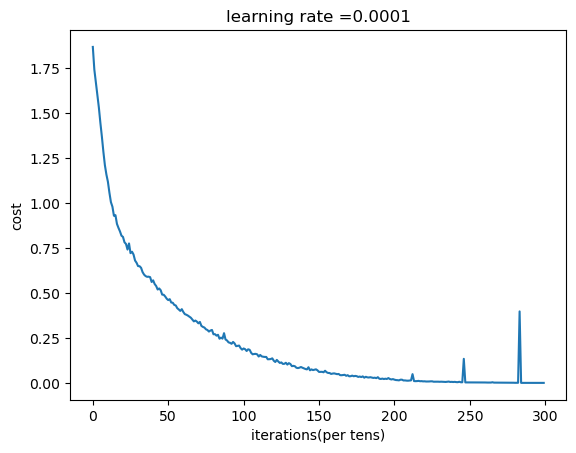

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.8666667


In [29]:
parameters = model(X_train, Y_train, X_test, Y_test)

C:\Users\12516\AppData\Local\Temp\ipykernel_20056\106919609.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(fname)


Your algorithm predicts: y = 3


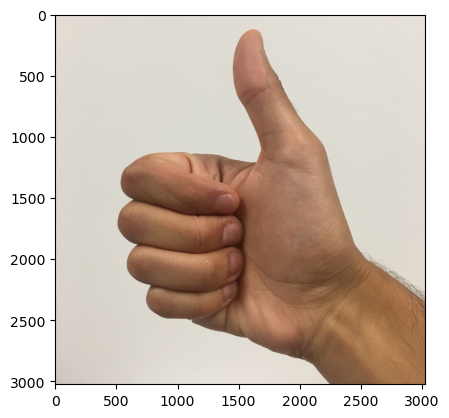

In [30]:
import scipy
from PIL import Image
from scipy import ndimage
import imageio

my_image = "thumbs_up.jpg"

fname = my_image
image = imageio.imread(fname)
image_resized = Image.fromarray(image).resize((64, 64))
my_image = np.array(image_resized).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))